# Priorieties based on Estimated Houses Damaged

In [286]:
### Author: Krystyna Milian, krystyna.milian@gmail.com

%pylab inline
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn import cross_validation
from sklearn.cross_validation import  cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import  RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from pandas.tools.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
import StringIO, pydotplus
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
from IPython.display import Image  


Populating the interactive namespace from numpy and matplotlib


# Plan
    1. Load data 
        - Hayian overview prepared by Red Cross
    2. Predict number of houses damaged
       Algorithms:  
       a) Random Forest Regressor
       b) Gradient Boost Regressor
       
       3 approaches: 
       a) Using all features
       b) Using a subset of features
       c) Using a subset of featues, filling missing values with averages
       
       
    3. Export prediction results




### Loading data

In [204]:
H = pd.read_csv("./data/Haiyan.csv")
H.index = H['M_Code']

### Exploration

In [205]:
H.columns

Index([u'Unnamed: 0', u'OBJECTID', u'ISO', u'P_Code', u'M_Code',
       u'Municipality', u'Area (km2)', u'Avg. Elevation (m)', u'Perimeter (m)',
       u'Coastline Length (m)', u'C/P Ratio',
       u'Distance to coastline (m, mean)', u'Distance to coastline (m, stdev)',
       u'Ruggedness index (mean)', u'Ruggedness index (stdev)',
       u'Slope (mean)', u'Slope (stdev)', u'Landuse (Most common)',
       u'Poverty (%)', u'Avg. Windspeed (km/h)',
       u'Distance from typhoon path (km)', u'Area Flooded (%)', u'Rainfallme',
       u'Surge Height int. (m)', u'Surge risk class (REACH)',
       u'People affected', u'People affected (% 2010)', u'Deaths',
       u'Houses damaged (REACH)', u'Houses damaged (% Shelter Cluster)',
       u'Emergency shelter (% planned & reached Shelter Cluster)',
       u'Support to Self Recovery (% planned & reached Shelter Cluster)',
       u'OCHA CCCM', u'OCHA Education', u'OCHA Early Recovery & Livelyhoods',
       u'OCHA Food security and Agriculture', u'

In [206]:
H.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,668.0,3.335000e+02,192.979273,0.000000,166.750000,333.500000,500.250000,6.670000e+02
OBJECTID,668.0,7.882395e+02,462.641127,3.000000,336.750000,753.500000,1154.250000,1.532000e+03
Area (km2),668.0,1.626053e+02,187.929418,7.124600,63.571575,113.206050,199.385825,2.378325e+03
Avg. Elevation (m),668.0,1.724227e+02,143.400904,3.653769,68.862441,128.689500,243.922899,9.574721e+02
Perimeter (m),668.0,7.299853e+04,60550.456252,17587.515000,42570.188500,60143.054500,86427.579750,8.958719e+05
Coastline Length (m),668.0,1.708049e+04,24285.471310,0.000000,2262.692500,12186.740000,22275.352500,3.998398e+05
C/P Ratio,668.0,2.457186e-01,0.217020,0.000000,0.020000,0.230000,0.380000,1.000000e+00
"Distance to coastline (m, mean)",668.0,6.851020e+03,6159.965384,155.732039,2613.671997,4637.454876,9401.220724,3.821867e+04
"Distance to coastline (m, stdev)",668.0,3.000927e+03,1812.473031,121.528284,1681.028313,2657.599623,3848.262425,1.032078e+04
Ruggedness index (mean),668.0,3.867956e+01,19.994503,3.556218,24.167912,36.362904,50.988138,1.097074e+02


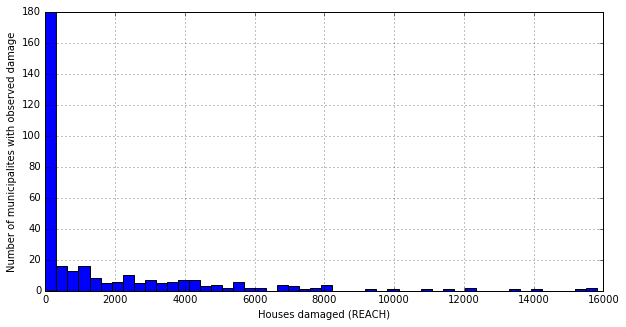

In [207]:
ax = H['Houses damaged (REACH)'].hist(bins=50, figsize=(10,5))
ax.set_ylabel("Number of municipalites with observed damage")
ax.set_xlabel("Houses damaged (REACH)")

/Users/Krysia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x136e72810>],
 'caps': [<matplotlib.lines.Line2D at 0x136e7e750>,
 'fliers': [<matplotlib.lines.Line2D at 0x136e89a50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x136e89410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x136e72a10>,
  <matplotlib.lines.Line2D at 0x136e7e110>]}

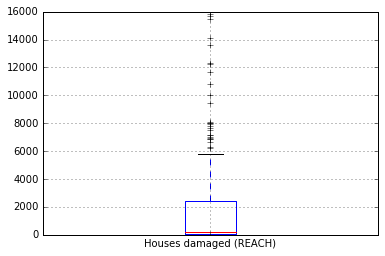

In [85]:
H[['Houses damaged (REACH)']].boxplot(figsize=(2,5))

In [208]:
H.columns

Index([u'Unnamed: 0', u'OBJECTID', u'ISO', u'P_Code', u'M_Code',
       u'Municipality', u'Area (km2)', u'Avg. Elevation (m)', u'Perimeter (m)',
       u'Coastline Length (m)', u'C/P Ratio',
       u'Distance to coastline (m, mean)', u'Distance to coastline (m, stdev)',
       u'Ruggedness index (mean)', u'Ruggedness index (stdev)',
       u'Slope (mean)', u'Slope (stdev)', u'Landuse (Most common)',
       u'Poverty (%)', u'Avg. Windspeed (km/h)',
       u'Distance from typhoon path (km)', u'Area Flooded (%)', u'Rainfallme',
       u'Surge Height int. (m)', u'Surge risk class (REACH)',
       u'People affected', u'People affected (% 2010)', u'Deaths',
       u'Houses damaged (REACH)', u'Houses damaged (% Shelter Cluster)',
       u'Emergency shelter (% planned & reached Shelter Cluster)',
       u'Support to Self Recovery (% planned & reached Shelter Cluster)',
       u'OCHA CCCM', u'OCHA Education', u'OCHA Early Recovery & Livelyhoods',
       u'OCHA Food security and Agriculture', u'

In [209]:
subH = H[[ u'Area (km2)', u'Avg. Elevation (m)', u'Perimeter (m)',
       u'Coastline Length (m)', u'C/P Ratio',
       u'Distance to coastline (m, mean)', u'Distance to coastline (m, stdev)',
       u'Ruggedness index (mean)', u'Ruggedness index (stdev)',
       u'Slope (mean)', u'Slope (stdev)', u'Landuse (Most common)',
       u'Population 2013 Filled',
       u'Pop. Density 2013 per km2', u'Poverty (%)', 'Poor', u'Avg. Windspeed (km/h)',
       u'Distance from typhoon path (km)', u'Area Flooded (%)',
       u'Rainfallme', u'Surge Height int. (m)', u'Surge risk class (REACH)', u'Houses damaged (REACH)']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11229cad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12dd81950>]], dtype=object)

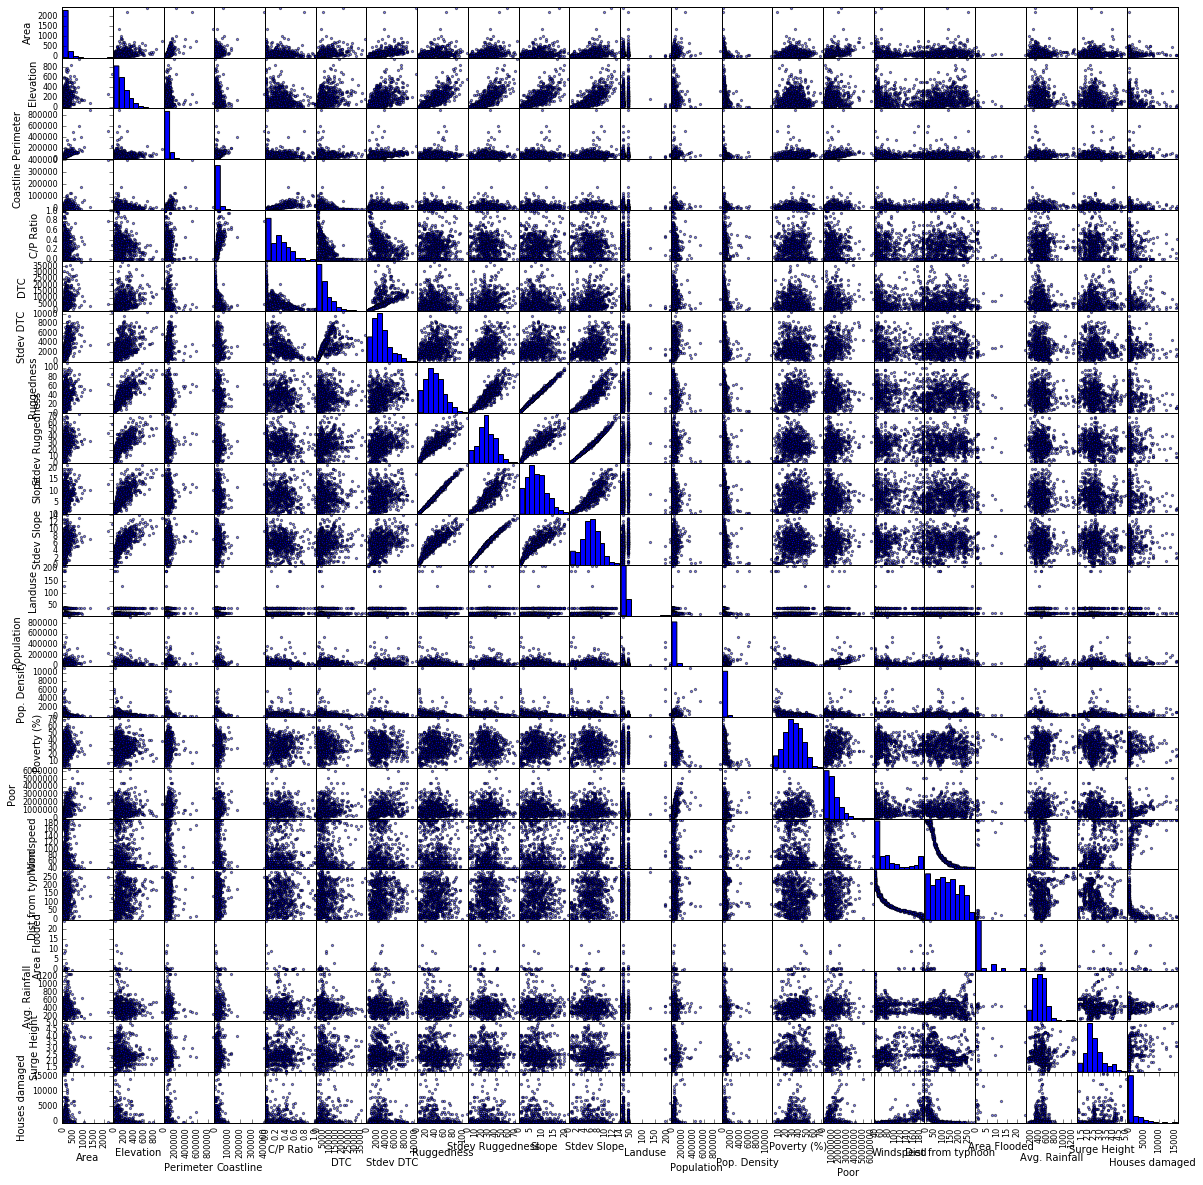

In [210]:
subH.columns = [u'Area', u'Elevation', u'Perimeter',
       u'Coastline', u'C/P Ratio',
       u'DTC', u'Stdev DTC',
       u'Ruggedness', u'Stdev Ruggedness',
       u'Slope', u'Stdev Slope', u'Landuse', u'Population',
       u'Pop. Density', u'Poverty (%)', 'Poor', u'Windspeed',
       u'Dist from typhoon', u'Area Flooded',
       u'Avg. Rainfall', u'Surge Height', u'Surge risk', 
        u'Houses damaged']
scatter_matrix(subH, figsize=(20,20))

# Prediction

#### Missing values

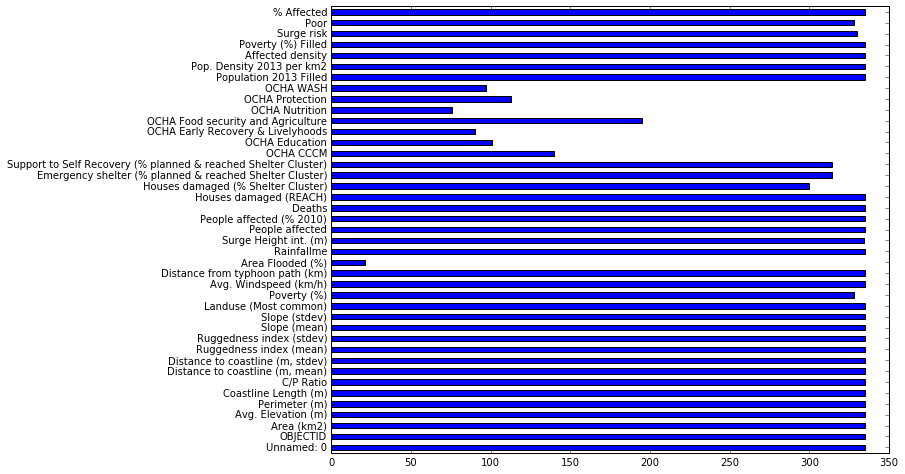

In [13]:
H[pd.notnull(H['Houses damaged (REACH)'])].describe().transpose()['count'].plot(kind='barh', figsize=(10,8))

#### Parameters selection, droping na

## 1. All parameters

In [211]:
H = H[[ u'Area (km2)', u'Avg. Elevation (m)', u'Perimeter (m)',
       u'Coastline Length (m)', u'C/P Ratio',
       u'Distance to coastline (m, mean)', u'Distance to coastline (m, stdev)',
       u'Ruggedness index (mean)', u'Ruggedness index (stdev)',
       u'Slope (mean)', u'Slope (stdev)', u'Landuse (Most common)',
       u'Population 2013 Filled',
       u'Pop. Density 2013 per km2', u'Poverty (%)', 'Poor', u'Avg. Windspeed (km/h)',
       u'Distance from typhoon path (km)', 
       u'Rainfallme', u'Surge Height int. (m)', u'Surge risk', u'Houses damaged (REACH)']]



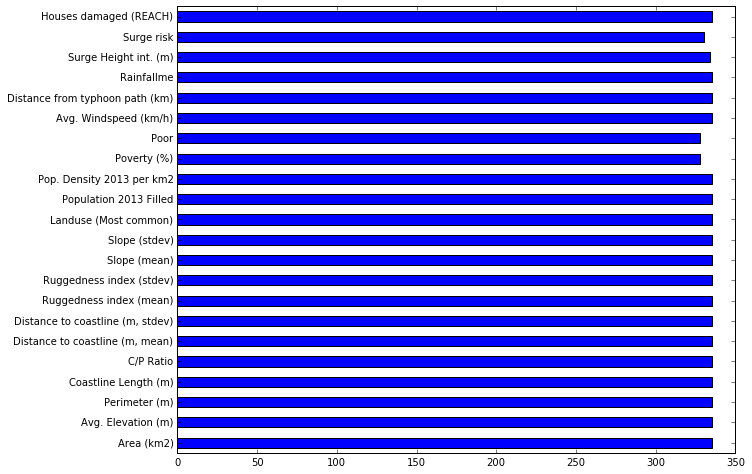

In [212]:
H[pd.notnull(H['Houses damaged (REACH)'])].describe().transpose()['count'].plot(kind='barh', figsize=(10,8))

In [213]:
H = H.dropna()

In [214]:
X = H[[  u'Area (km2)', u'Avg. Elevation (m)', u'Perimeter (m)',
       u'Coastline Length (m)', u'C/P Ratio',
       u'Distance to coastline (m, mean)', u'Distance to coastline (m, stdev)',
       u'Ruggedness index (mean)', u'Ruggedness index (stdev)',
       u'Slope (mean)', u'Slope (stdev)', u'Landuse (Most common)',
       u'Population 2013 Filled',
       u'Pop. Density 2013 per km2', u'Poverty (%)', 'Poor', u'Avg. Windspeed (km/h)',
       u'Distance from typhoon path (km)',
       u'Rainfallme', u'Surge Height int. (m)', u'Surge risk'
      ]]
y = np.ravel(H[[u'Houses damaged (REACH)']])

In [105]:
print H.shape
print X.shape
print y.shape

(323, 22)
(323, 21)
(323,)


### Random Forest Regressor

In [97]:
rf = RandomForestRegressor(n_estimators=200)
param_grid = { 
    'n_estimators': [10, 20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'], 
    'min_samples_leaf': [2, 5, 10, 20]
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 10)
CV_rf.fit(X, y)
print CV_rf.best_params_

{'max_features': 'auto', 'n_estimators': 100, 'min_samples_leaf': 10}


In [64]:
rf = RandomForestRegressor(max_features= 'auto', n_estimators= 100, min_samples_leaf= 10)
predicted_rf = cross_validation.cross_val_predict(rf, X, y, cv=10)



#### Accuracy 

In [65]:
print 'MAE: ', mean_absolute_error(y, predicted_rf)
print 'R2: ', r2_score(y, predicted_rf)

MAE:  860.620335262
R2:  0.685462653116


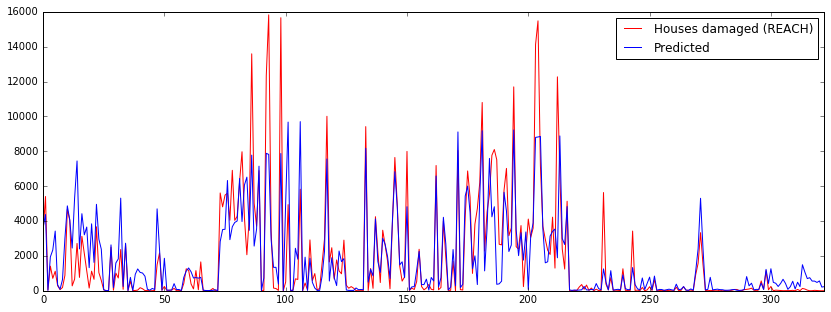

In [69]:
outcome.plot(figsize=(14, 5), color=['red', 'blue'])

### Gradient Boosting Regressor


In [70]:
gb = GradientBoostingRegressor(n_estimators=200)
param_grid = { 
    'n_estimators': [10, 20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'], 
    'min_samples_leaf': [2, 5, 10, 20]
}
CV_gb = GridSearchCV(estimator=gb, param_grid=param_grid, cv= 10)
CV_gb.fit(X, y)
print CV_gb.best_params_

{'max_features': 'log2', 'n_estimators': 100, 'min_samples_leaf': 20}


In [249]:
gb = GradientBoostingRegressor(max_features= 'log2', n_estimators= 100, min_samples_leaf= 20)
predicted_gb = cross_validation.cross_val_predict(gb, X, y, cv=10)
# prediction can be negative

predicted_gb = [max(0,x) for x in predicted_gb]

print 'MAE: ', mean_absolute_error(y, predicted_gb)
print 'R2: ', r2_score(y, predicted_gb)


MAE:  1018.63873355
R2:  0.647593403386


## 2. Select parameters


In [238]:
m = ExtraTreesRegressor()
m = m.fit(X, y)
zipped =  zip(m.feature_importances_, X.columns)
c = [str(a) + ' ' + b for (a, b) in zipped]
print sort(c)[::-1]
         

['0.414805837464 Avg. Windspeed (km/h)'
 '0.16803959203 Population 2013 Filled' '0.1027230994 Poor'
 '0.0984731112386 Distance from typhoon path (km)'
 '0.054445776127 Surge risk' '0.0238766062344 Poverty (%)'
 '0.0237261119024 Pop. Density 2013 per km2'
 '0.0148493162736 Surge Height int. (m)' '0.0144255160085 Area (km2)'
 '0.0135054858617 Rainfallme' '0.00968350935646 C/P Ratio'
 '0.00965549968506 Ruggedness index (mean)' '0.00926663767825 Slope (mean)'
 '0.00748724562642 Slope (stdev)'
 '0.00715702329478 Distance to coastline (m, stdev)'
 '0.00681156480954 Distance to coastline (m, mean)'
 '0.00545803659472 Ruggedness index (stdev)'
 '0.00483220017802 Avg. Elevation (m)'
 '0.00461860554464 Landuse (Most common)' '0.00322339094639 Perimeter (m)'
 '0.0029358337455 Coastline Length (m)']


#### Select features with importance > 0.02


In [239]:
selected = [b for (a,b) in zipped if a > 0.02]
print selected

['Population 2013 Filled', 'Pop. Density 2013 per km2', 'Poverty (%)', 'Poor', 'Avg. Windspeed (km/h)', 'Distance from typhoon path (km)', 'Surge risk']


In [240]:
X2 = H[[ 'Population 2013 Filled', 'Pop. Density 2013 per km2', 'Poor', 'Avg. Windspeed (km/h)', 'Distance from typhoon path (km)', 'Rainfallme', 'Surge risk']]
y = np.ravel(H[[u'Houses damaged (REACH)']])

### Random Forest

In [230]:
rf = RandomForestRegressor(n_estimators=200)
param_grid = { 
    'n_estimators': [ 50, 75, 100],
    'max_features': ['auto', 'sqrt', 'log2'], 
    'min_samples_leaf': [ 5, 10, 20]
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 10)
CV_rf.fit(X2, y)
print CV_rf.best_params_

{'max_features': 'log2', 'n_estimators': 100, 'min_samples_leaf': 5}


In [246]:
mae = []
r2= []
mse = []
mde = []

for i in range(100): 
    rf = RandomForestRegressor(max_features= 'log2', n_estimators=100, min_samples_leaf= 5)
    predicted_rf = cross_validation.cross_val_predict(rf, X2, y, cv=10)
    
    mae.append(mean_absolute_error(y, predicted_rf))
    r2.append(r2_score(y, predicted_rf))
    mse.append(mean_squared_error(y, predicted_rf))
    mde.append(median_absolute_error(y, predicted_rf))
    
print 'Mean Absolute Error: ', numpy.mean(mae)
print 'R2: ', numpy.mean(r2)
print 'Median Absolute Error: ', numpy.mean(mde)
print 'Mean Squared Error: ', numpy.mean(mse)

Mean Absolute Error:  869.787653084
R2:  0.703387055812
Median Absolute Error:  380.661275712
Mean Squared Error:  2543751.99446


### Gradient Boosting Regressor

In [247]:
gb = GradientBoostingRegressor(max_features= 'log2', n_estimators= 100, min_samples_leaf= 5)

param_grid = { 
    'n_estimators': [ 50, 75, 100],
    'max_features': ['auto', 'sqrt', 'log2'], 
    'min_samples_leaf': [ 5, 10, 20]
}
CV_rf = GridSearchCV(estimator=gb, param_grid=param_grid, cv= 10)
CV_rf.fit(X2, y)
print CV_rf.best_params_

{'max_features': 'log2', 'n_estimators': 75, 'min_samples_leaf': 5}


In [243]:
mae = []
r2= []
mse = []
mde = []

for i in range(100): 
    gb = GradientBoostingRegressor(max_features= 'log2', n_estimators= 75, min_samples_leaf= 5)
    predicted_gb = cross_validation.cross_val_predict(gb, X2, y, cv=10)
    # prediction can be negative
    predicted_gb = [max(0,x) for x in predicted_gb]
    mae.append(mean_absolute_error(y, predicted_gb))
    r2.append(r2_score(y, predicted_gb))
    mse.append(mean_squared_error(y, predicted_gb))
    mde.append(median_absolute_error(y, predicted_gb))
    
print 'Mean Absolute Error: ', numpy.mean(mae)
print 'R2: ', numpy.mean(r2)
print 'Median Absolute Error: ', numpy.mean(mde)
print 'Mean Squared Error: ', numpy.mean(mse)

Mean Absolute Error:  850.211526727
R2:  0.73761624534
Median Absolute Error:  389.137451798
Mean Squared Error:  2250202.53603


## 3. Filling missing values with mean 

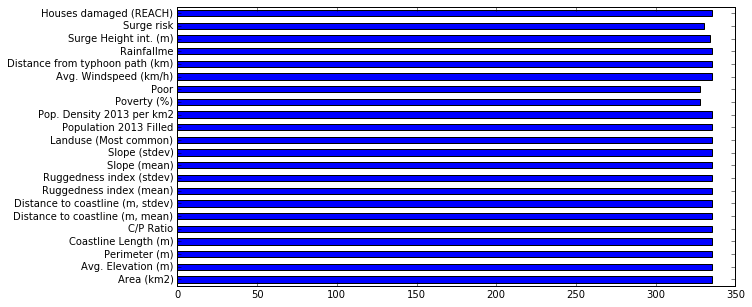

In [274]:
H = pd.read_csv("./data/Haiyan.csv")
H.index = H['M_Code']
H = H[[ u'Area (km2)', u'Avg. Elevation (m)', u'Perimeter (m)',
       u'Coastline Length (m)', u'C/P Ratio',
       u'Distance to coastline (m, mean)', u'Distance to coastline (m, stdev)',
       u'Ruggedness index (mean)', u'Ruggedness index (stdev)',
       u'Slope (mean)', u'Slope (stdev)', u'Landuse (Most common)',
       u'Population 2013 Filled',
       u'Pop. Density 2013 per km2', u'Poverty (%)', 'Poor', u'Avg. Windspeed (km/h)',
       u'Distance from typhoon path (km)', 
       u'Rainfallme', u'Surge Height int. (m)', u'Surge risk', u'Houses damaged (REACH)']]

H[pd.notnull(H['Houses damaged (REACH)'])].describe().transpose()['count'].plot(kind='barh', figsize=(10,5))

In [279]:
H['Surge risk'] = H['Surge risk'].fillna(H['Surge risk'].mean())
H['Surge Height int. (m)'] = H['Surge Height int. (m)'].fillna(H['Surge Height int. (m)'].mean())
H['Poor'] = H['Poor'].fillna(H['Poor'].mean())
H['Poverty (%)'] = H['Poverty (%)'].fillna(H['Poverty (%)'].mean())
H = H[pd.notnull(H['Houses damaged (REACH)'])]

In [280]:
X3 = H[selected]
y = np.ravel(H[[u'Houses damaged (REACH)']])

In [281]:
X3.shape

(335, 7)

#### Random Forest

In [285]:
mae = []
r2= []
mse = []
mde = []

for i in range(100): 
    rf = RandomForestRegressor(max_features= 'log2', n_estimators=100, min_samples_leaf= 5)
    predicted_rf = cross_validation.cross_val_predict(rf, X3, y, cv=10)
    
    mae.append(mean_absolute_error(y, predicted_rf))
    r2.append(r2_score(y, predicted_rf))
    mse.append(mean_squared_error(y, predicted_rf))
    mde.append(median_absolute_error(y, predicted_rf))
    
print 'Mean Absolute Error: ', numpy.mean(mae)
print 'R2: ', numpy.mean(r2)
print 'Median Absolute Error: ', numpy.mean(mde)
print 'Mean Squared Error: ', numpy.mean(mse)

Mean Absolute Error:  837.789969266
R2:  0.70677434827
Median Absolute Error:  364.232691208
Mean Squared Error:  2455123.78433


#### Gradient Boost

In [283]:
mae = []
r2= []
mse = []
mde = []

for i in range(100): 
    gb = GradientBoostingRegressor(max_features= 'log2', n_estimators= 75, min_samples_leaf= 5)
    predicted_gb = cross_validation.cross_val_predict(gb, X3, y, cv=10)
    # prediction can be negative
    predicted_gb = [max(0,x) for x in predicted_gb]
    mae.append(mean_absolute_error(y, predicted_gb))
    r2.append(r2_score(y, predicted_gb))
    mse.append(mean_squared_error(y, predicted_gb))
    mde.append(median_absolute_error(y, predicted_gb))
    
print 'Mean Absolute Error: ', numpy.mean(mae)
print 'R2: ', numpy.mean(r2)
print 'Median Absolute Error: ', numpy.mean(mde)
print 'Mean Squared Error: ', numpy.mean(mse)

Mean Absolute Error:  810.252669274
R2:  0.757694641238
Median Absolute Error:  363.993963489
Mean Squared Error:  2028777.65249


In [244]:
outcome = pd.DataFrame({'Houses damaged (REACH)': y, 'PredictedGB': predicted_gb, 'PredictedRF': predicted_rf})
errors = pd.DataFrame()
errors['errors'] = (outcome['Houses damaged (REACH)'] - outcome.PredictedGB).apply(lambda x: np.abs(x))
print "Quantile 80%: ", errors.quantile(0.80).errors
print "Quantile 90%: ", errors.quantile(0.90).errors



Quantile 80%:  1429.29952252
Quantile 90%:  2334.15721819


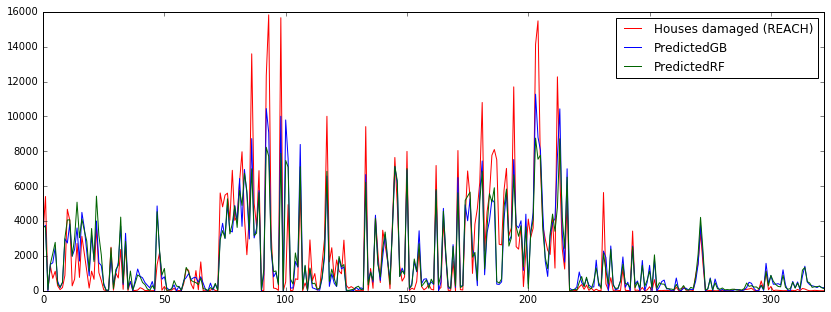

In [198]:
outcome.plot(figsize=(14, 5), color=['red', 'blue', 'darkgreen'])

In [287]:
outcome.describe()

,Houses damaged (REACH),PredictedGB,PredictedRF
count,323.000000,323.000000,323.000000
mean,1773.585139,1747.240005,1723.548124
std,2933.024286,2359.240224,2129.666049
min,1.000000,0.000000,27.633736
25%,25.000000,116.703167,157.672720
50%,233.000000,639.421400,668.454552
75%,2515.500000,2783.369334,2714.600938
max,15824.000000,11669.698882,9157.526474


### Export the best prediction results

In [289]:
prediction = pd.DataFrame()
prediction['Predicted Houses Damaged'] =  predicted_gb
prediction.index = X3.index
prediction.to_csv("./data/Predicted houses damaged.csv")